In [1]:
# import libraries  and packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# About Dataset

* **Artist_name**: The name of the artist

* Track_name: The name of the song

* Release_date: When this song was released

* Genre: The categorical genre of this song

* Lyrics: The pre-tokenized lyrics of this song. Disclaimer: note that as this is real-world data, lyrical content is often obscene. 

* Len:  The number of words in the lyrics of this song

* Dating: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with dating.

* Violence: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with violence.

* World/life: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the world or life in general terms.

* Night/time: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do night-life or time.

* Shake the audience: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with provocative feeling.

* Family/gospel: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with family-oriented content or the gospel.

* Romantic: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with romantic feeling.

* Communication: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with communication (either in romantic terms or otherwise).

* Obscene: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with obscene content (money, rockstar-lifestyle, etc).

* Music: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with music (music about music, basically).

* Movement/places: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with movement or various locations.

* Light/visual perceptions: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the sun or other physical weather-related patterns.

* Family/spiritual: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

* Sadness: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

* Feelings: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with emotions, either positive or negative.

* Topic: The categorical label of lyrical content

* Age: A score from 0 to 1 expressing how “old” a song is from our perspective. 1 being the oldest, and 0 being the newest.



In [2]:
# Read train cvs file into dataframe

df =pd.read_csv("/Users/sa19/Desktop/Music_Recommendation_Algorithm/train.csv")

In [3]:
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [5]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [6]:
df.shape

(28362, 24)

In [7]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

In [10]:
df_genre = df.value_counts("genre")
df_genre.to_frame()

,count
genre,
pop,7038
country,5444
blues,4603
rock,4032
jazz,3844
reggae,2497
hip hop,904


# Univariate Analysis

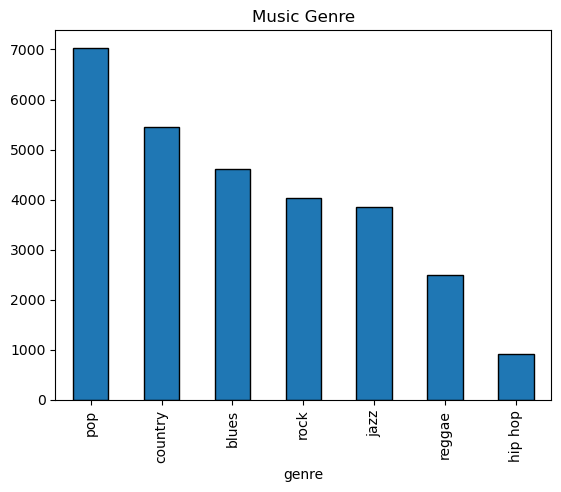

In [11]:
#Plot are bar graph with showing the various genres within the dataset
genre = df_genre.plot.bar(title="Music Genre",edgecolor="black")


In [12]:
topic_order=df.value_counts("topic")
topic_order.to_frame()

,count
topic,
sadness,6094
violence,5707
world/life,5419
obscene,4881
music,2303
night/time,1823
romantic,1523
feelings,612


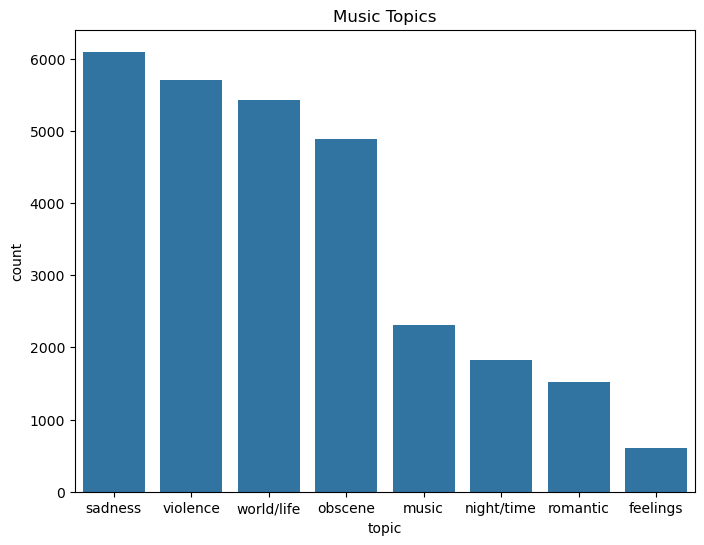

In [13]:
#Get the count of each topic as a DataFrame
topic_counts = df["topic"].value_counts().reset_index()
topic_counts.columns = ["topic", "count"]
#Plot histogram of showing "topic" within dataset
plt.figure(figsize=(8,6))
sns.barplot(data = topic_counts,x = "topic",y ="count")
plt.title("Music Topics",loc= "center")
plt.show()

Comment on observation

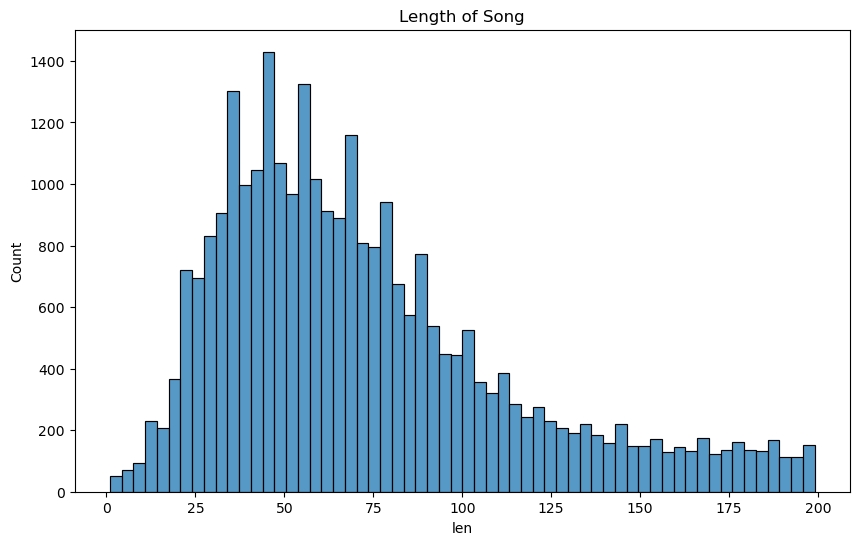

In [14]:
# Histogrm of song "len"
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "len")
plt.title("Length of Song",loc= "center")
plt.show()


 **Left skewed distrubution**

In [15]:
df_genre = df.value_counts("release_date")
df_genre.to_frame()

,count
release_date,
2017,660
2018,653
2015,617
2009,596
2012,588
...,...
1955,106
1952,59
1951,58


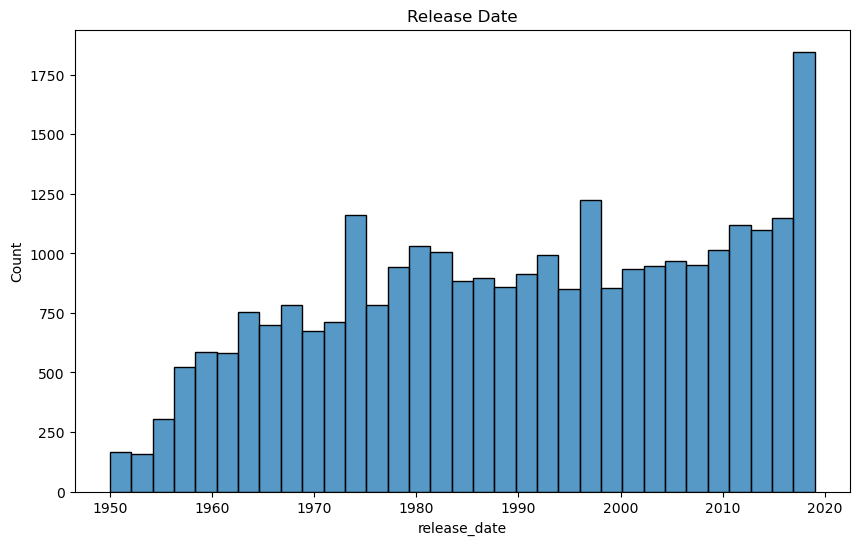

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "release_date")
plt.title("Release Date",loc= "center")
plt.show()

# Bivariate Analysis

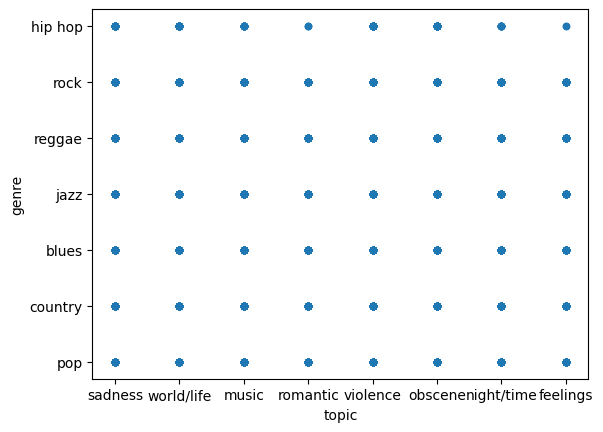

In [22]:
#create a scaatter plot between  "genre and topics"

df.plot(kind="scatter", x="topic", y="genre")

plt.show()

# Multivartiate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

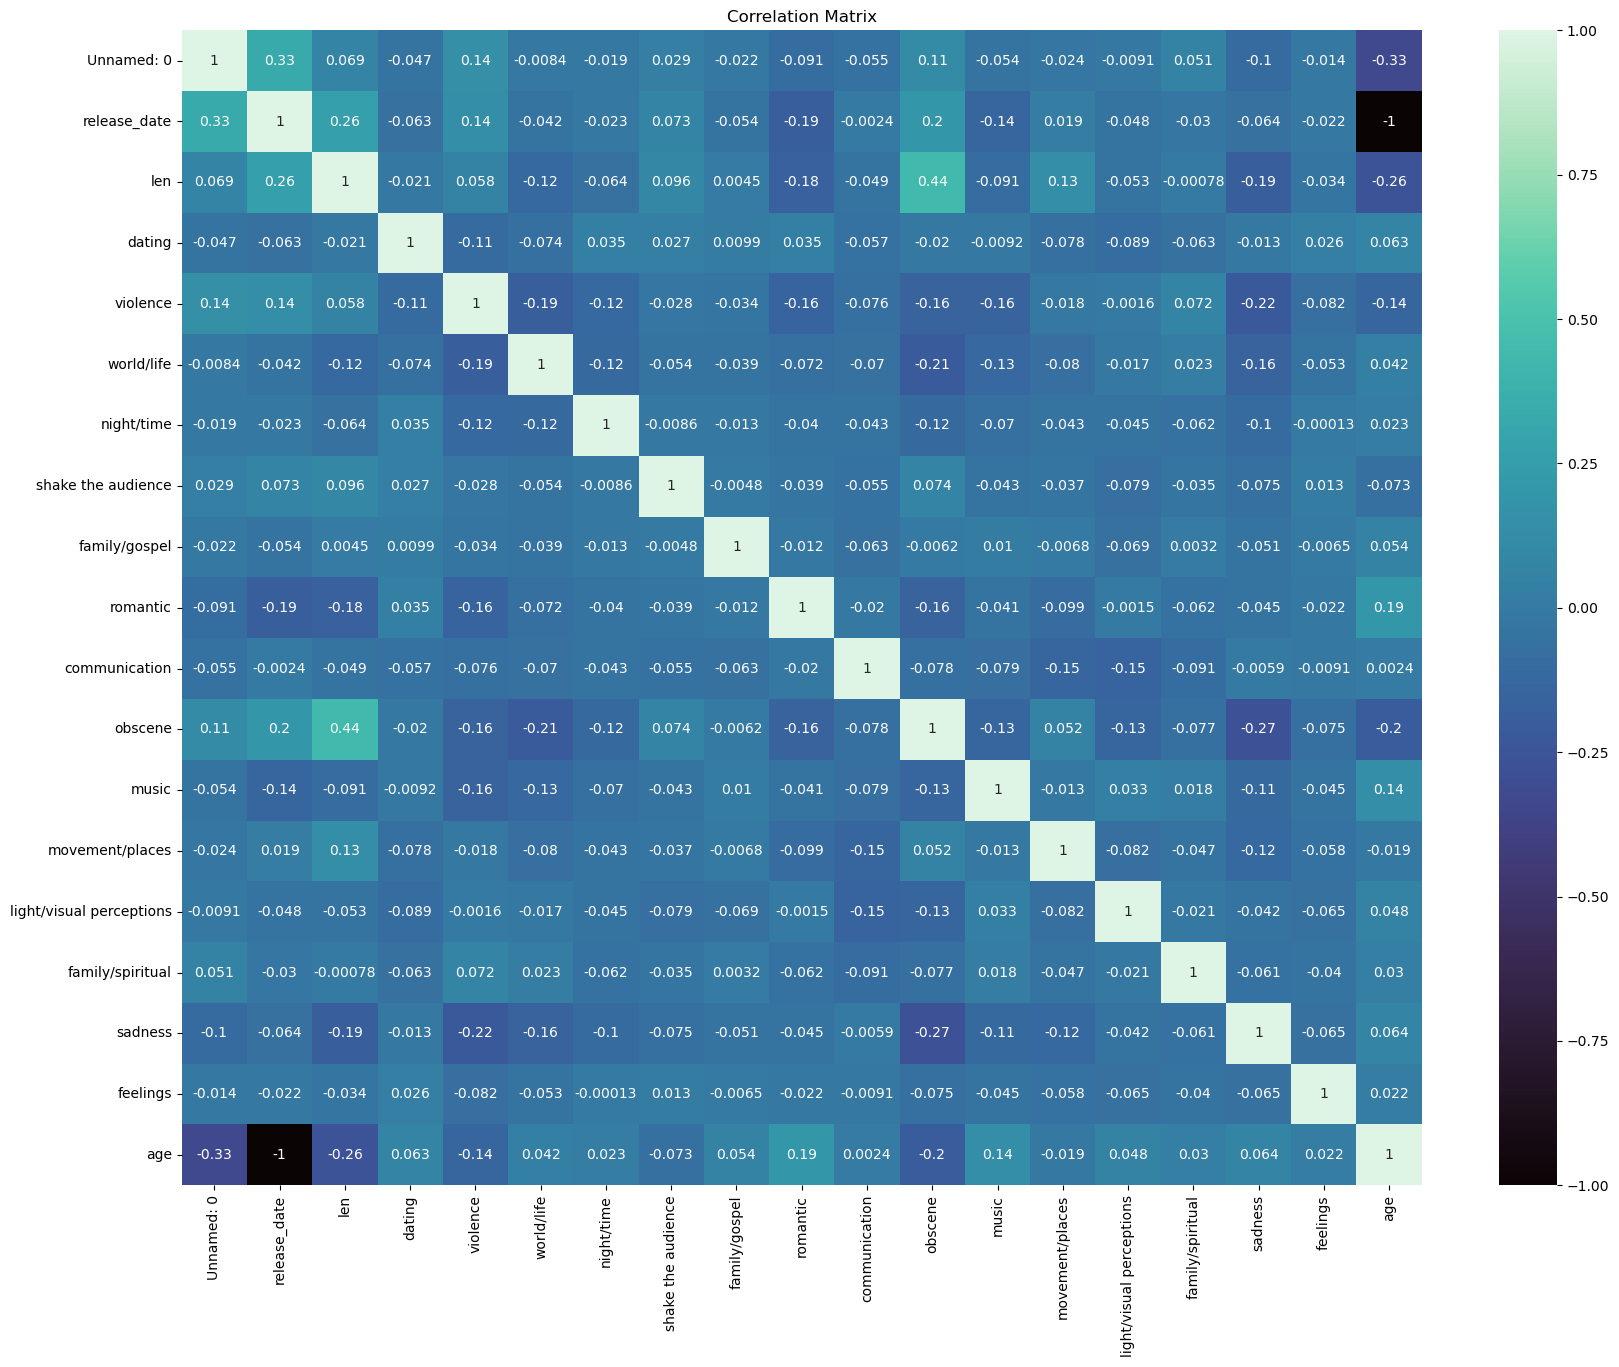

In [27]:
# create heatmap 
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot= True, cmap = 'mako')
plt.title('Correlation Matrix')
plt.show